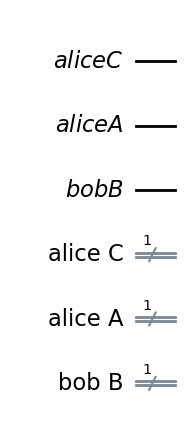

In [1]:
from qiskit import ClassicalRegister,QuantumRegister, QuantumCircuit
q_C = QuantumRegister(1,name='aliceC')
q_A = QuantumRegister(1,name='aliceA')
q_B = QuantumRegister(1,name='bobB')
c_C = ClassicalRegister(1,name='alice C')
c_A = ClassicalRegister(1,name='alice A')
c_B = ClassicalRegister(1,name='bob B')
qc = QuantumCircuit(q_C,q_A,q_B,c_C,c_A,c_B)
qc.draw('mpl')

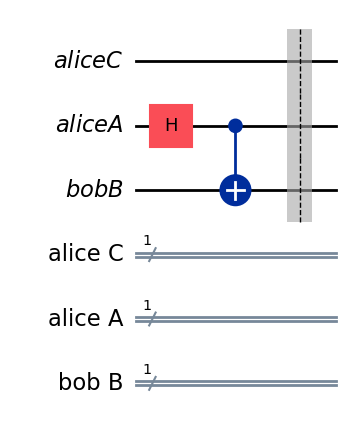

In [2]:
qc.h(q_A[0])
qc.cx(q_A[0],q_B[0])
qc.barrier()
qc.draw('mpl')

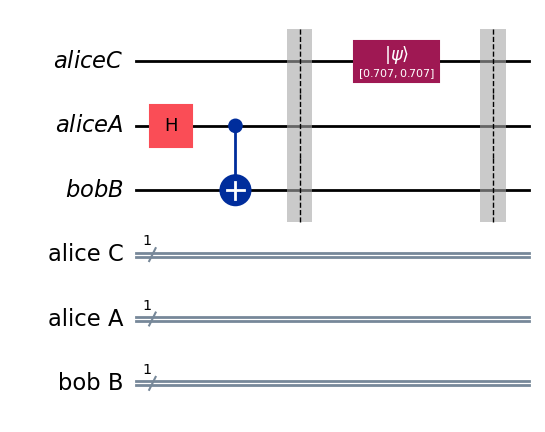

In [3]:
from math import sqrt
ampl=[1/sqrt(2),1/sqrt(2)]
qc.initialize(ampl,q_C[0])
qc.barrier()
qc.draw('mpl')

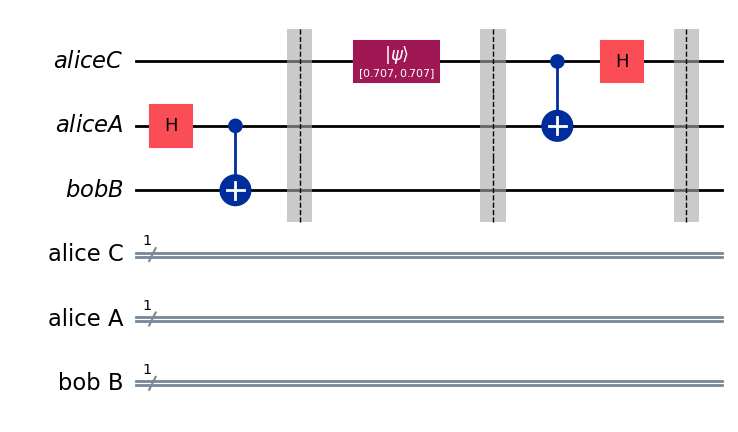

In [4]:
qc.cx(q_C[0],q_A[0])
qc.h(q_C[0])
qc.barrier()
qc.draw('mpl')

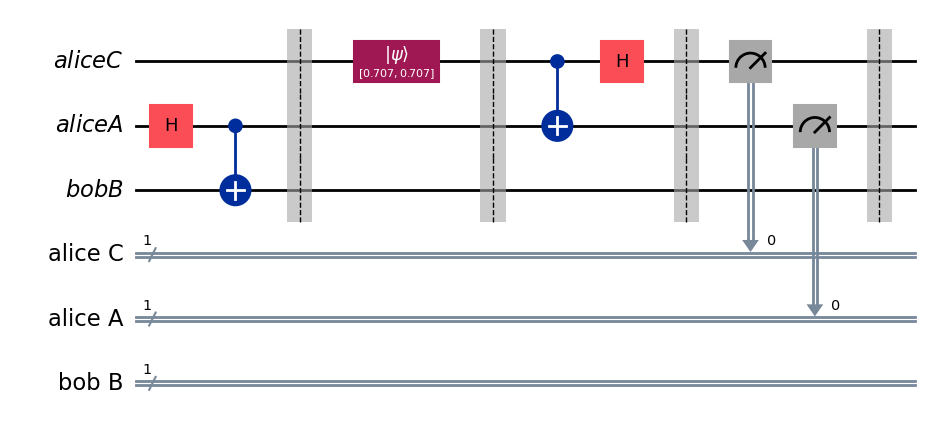

In [5]:
qc.measure(q_C[0],c_C[0])
qc.measure(q_A[0],c_A[0])
qc.barrier()
qc.draw('mpl')

C:\Users\Asgardian\AppData\Local\Temp\ipykernel_20964\3776159776.py:1: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(q_B[0]).c_if(c_C,1)
C:\Users\Asgardian\AppData\Local\Temp\ipykernel_20964\3776159776.py:2: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(q_B[0]).c_if(c_A,1)


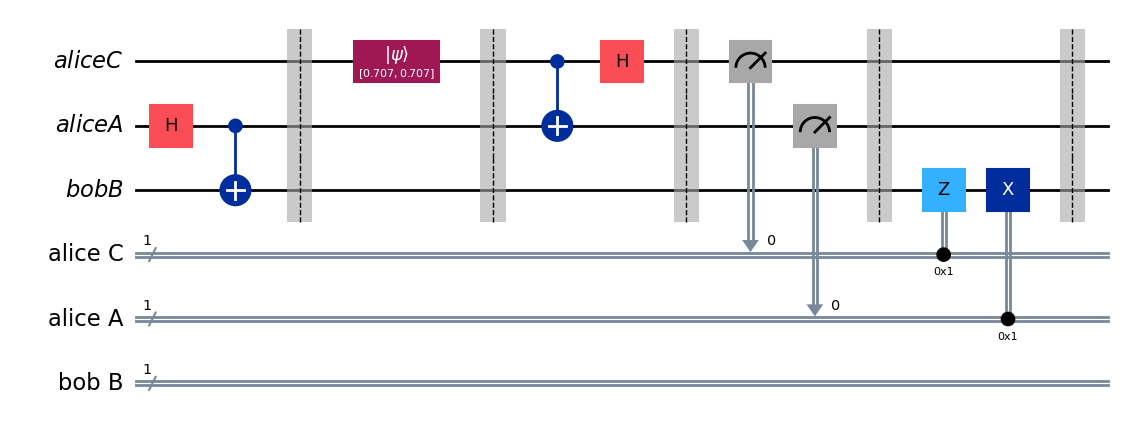

In [6]:
qc.z(q_B[0]).c_if(c_C,1)
qc.x(q_B[0]).c_if(c_A,1)
qc.barrier()
qc.draw('mpl')

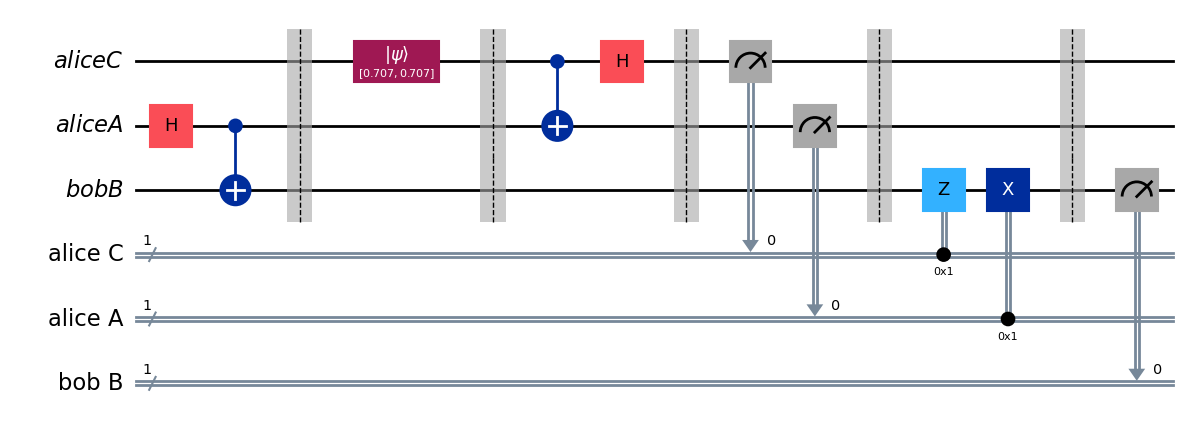

In [7]:
qc.measure(q_B[0],c_B)
qc.draw('mpl')

In [10]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

ModuleNotFoundError: No module named 'qiskit_aer'